### 1. Data Manipulation with Pandas

#### Step 1: Creating, Indexing, and Modifying DataFrames


##### a. Creating a dataframe
Create a DataFrame with columns Student, Score, and Grade using a dictionary. Add data for five students with their scores and corresponding grades.

In [1]:
import pandas as pd
data = { 'student' : ['Alice','Bob','Stephen','Charlie','Freddy'],
         'Marks'   : [45,80,75,56,66],
         'Grade'   : ['D','A1','A2','C2','C1']
        }
df = pd.DataFrame(data)
df

,student,Marks,Grade
0,Alice,45,D
1,Bob,80,A1
2,Stephen,75,A2
3,Charlie,56,C2
4,Freddy,66,C1


**How do you retrieve only the Score column**

In [2]:
df['Marks']

0    45
1    80
2    75
3    56
4    66
Name: Marks, dtype: int64

**Can you select both Score and Grade columns at once**

In [3]:
df[['Marks','Grade']]

,Marks,Grade
0,45,D
1,80,A1
2,75,A2
3,56,C2
4,66,C1


 **b. Indexing by Row**

**How can you access the data for the first student (Alice)?**

In [4]:
df.iloc[0]

student    Alice
Marks         45
Grade          D
Name: 0, dtype: object

**How would you retrieve data for the last two students**

In [5]:
df.tail(2)

,student,Marks,Grade
3,Charlie,56,C2
4,Freddy,66,C1


**How do you select students who scored above 80**

In [6]:
df[df['Marks']>70]

,student,Marks,Grade
1,Bob,80,A1
2,Stephen,75,A2


**Can you filter for students who received a grade of B or higher**

In [7]:
df[df['Grade'].isin(['A1','A2','B1'])]

,student,Marks,Grade
1,Bob,80,A1
2,Stephen,75,A2


**How can you use .loc to get data for a specific student by name**

In [8]:
df.loc[df['student']=='Alice']

,student,Marks,Grade
0,Alice,45,D


**How would you use .iloc to access the data for the third student**

In [9]:
df.iloc[2]

student    Stephen
Marks           75
Grade           A2
Name: 2, dtype: object

**If you wanted to change Alice's grade to B+, how would you do it**

In [10]:
df.loc[df['student'] == 'Alice', 'Grade'] = 'B1'
df

,student,Marks,Grade
0,Alice,45,B1
1,Bob,80,A1
2,Stephen,75,A2
3,Charlie,56,C2
4,Freddy,66,C1


**c.modifying**

**How can you add a new column, Pass_Fail, that marks students with Score >= 80 as "Pass" and others as "Fail"?**

In [11]:
df['Remarks']=df['Marks'].apply(lambda x : 'pass' if x>24 else 'fail')
df

,student,Marks,Grade,Remarks
0,Alice,45,B1,pass
1,Bob,80,A1,pass
2,Stephen,75,A2,pass
3,Charlie,56,C2,pass
4,Freddy,66,C1,pass


#### Step 2: Grouping, Merging, and Aggregating

In [12]:
data = {
    'Student': ['Alice', 'Bob', 'Stephen', 'Charlie', 'Freddy', 'David', 'Eva', 'Grace', 'Hannah', 'Ian'],
    'Score': [45, 80, 75, 56, 66, 82, 92, 70, 61, 78],
    'Grade': ['D', 'A1', 'A2', 'C2', 'C1', 'A1', 'A1', 'A2', 'C1', 'B1'],
    'Age': [20, 21, 19, 22, 20, 23, 21, 20, 19, 22],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose'],
    'Subject': ['Math', 'Science', 'Math', 'History', 'Science', 'Math', 'Science', 'History', 'Math', 'History']
}
df = pd.DataFrame(data)
df

,Student,Score,Grade,Age,City,Subject
0,Alice,45,D,20,New York,Math
1,Bob,80,A1,21,Los Angeles,Science
2,Stephen,75,A2,19,Chicago,Math
3,Charlie,56,C2,22,Houston,History
4,Freddy,66,C1,20,Phoenix,Science
5,David,82,A1,23,Philadelphia,Math
6,Eva,92,A1,21,San Antonio,Science
7,Grace,70,A2,20,San Diego,History
8,Hannah,61,C1,19,Dallas,Math
9,Ian,78,B1,22,San Jose,History


**How do you group students by Grade and calculate the average Score for each group**

In [13]:
df.groupby('Grade')['Score'].mean()

Grade
A1    84.666667
A2    72.500000
B1    78.000000
C1    63.500000
C2    56.000000
D     45.000000
Name: Score, dtype: float64

**How can you group by Grade and get both the mean and count of scores for each grade?**

In [14]:
result = df.groupby('Grade')['Score'].agg(['mean', 'count'])
result

,mean,count
Grade,,
A1,84.666667,3
A2,72.500000,2
B1,78.000000,1
C1,63.500000,2
C2,56.000000,1
D,45.000000,1


**How would you group by Grade and filter only those groups with an average score above 60?**

In [15]:
grouped = df.groupby('Grade')['Score'].mean()
grouped[grouped>60]

Grade
A1    84.666667
A2    72.500000
B1    78.000000
C1    63.500000
Name: Score, dtype: float64

**How do you calculate the sum of scores for each grade**

In [16]:
grade_sum = df.groupby("Grade")["Score"].sum()
print(grade_sum)


Grade
A1    254
A2    145
B1     78
C1    127
C2     56
D      45
Name: Score, dtype: int64


<b>How do you create a simple line plot in Matplotlib</b>

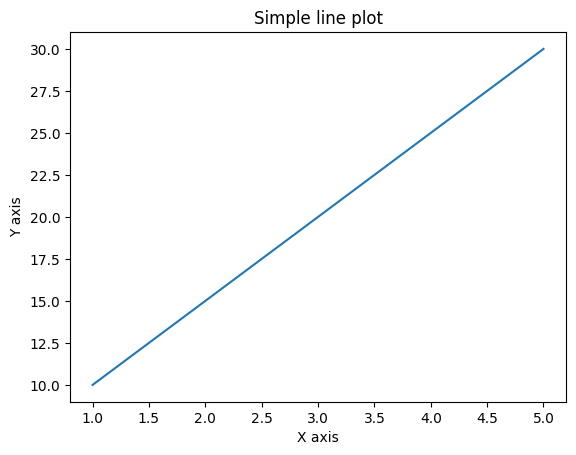

In [17]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [10,15,20,25,30]
plt.plot(x,y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Simple line plot')
plt.show()

##### Customisation 

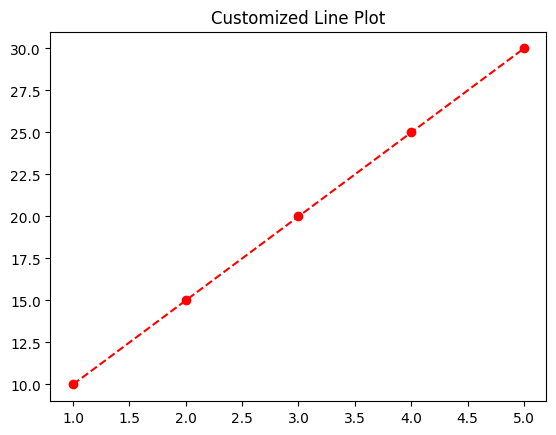

In [18]:
plt.plot(x, y, color='red', linestyle='--', marker='o')
plt.title("Customized Line Plot")
plt.show()


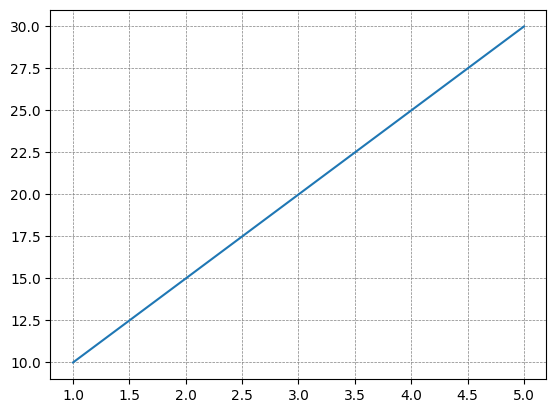

In [19]:
# add grid lines
plt.plot(x, y)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


##### Annotations


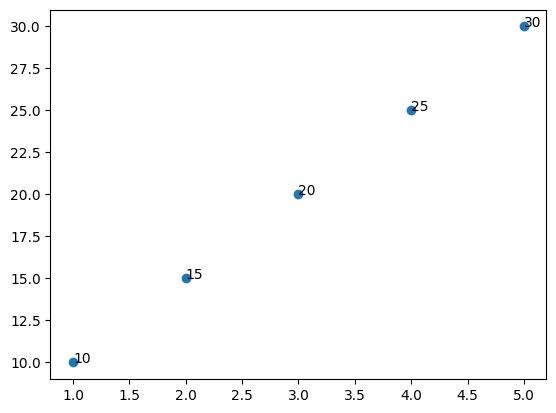

In [20]:
plt.scatter(x, y)
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

##### Plot a histogram in Seaborn

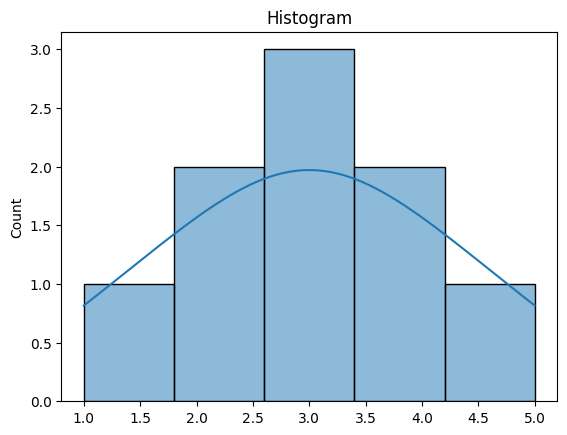

In [22]:
import seaborn as sns
data = [1, 2, 2, 3, 3, 3, 4, 4, 5]
sns.histplot(data, bins=5, kde=True)
plt.title("Histogram")
plt.show()

##### Customization

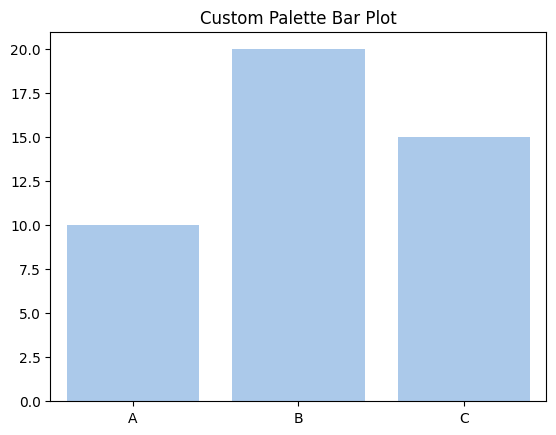

In [23]:
sns.set_palette("pastel")
sns.barplot(x=["A", "B", "C"], y=[10, 20, 15])
plt.title("Custom Palette Bar Plot")
plt.show()

##### Annotations

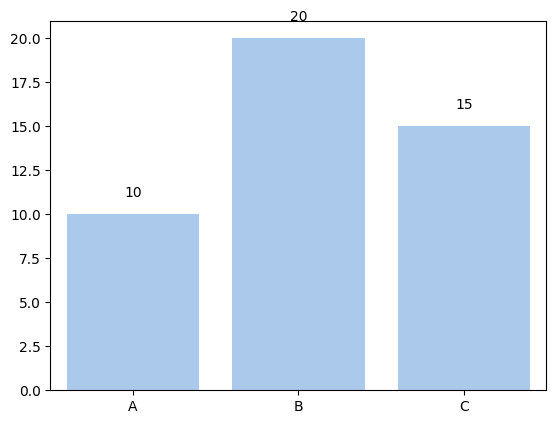

In [24]:
sns.barplot(x=["A", "B", "C"], y=[10, 20, 15])
for i, val in enumerate([10, 20, 15]):
    plt.text(i, val + 1, str(val), ha='center')
plt.show()

#### Comparisons

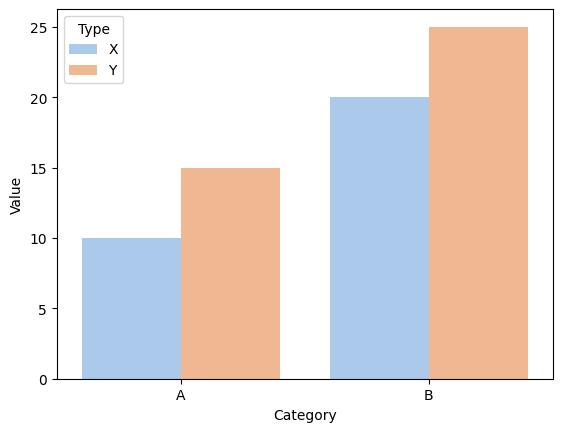

In [25]:
import pandas as pd
data = pd.DataFrame({
    "Category": ["A", "A", "B", "B"],
    "Value": [10, 15, 20, 25],
    "Type": ["X", "Y", "X", "Y"]
})
sns.barplot(x="Category", y="Value", hue="Type", data=data)
plt.show()


##### Create multiple subplots

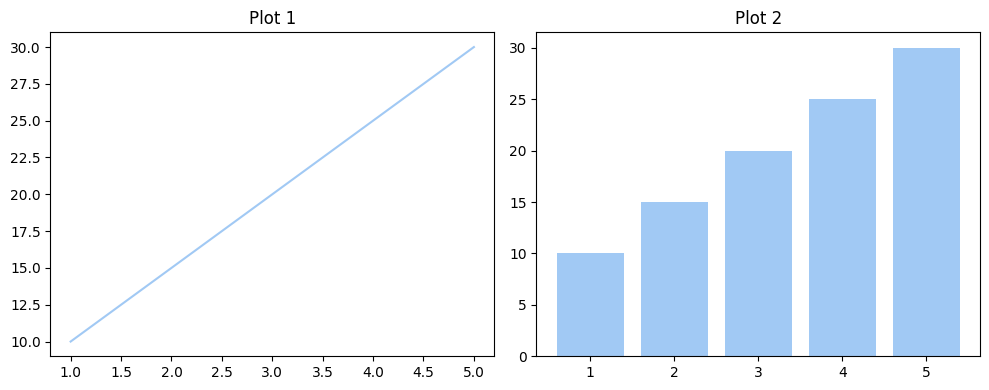

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))#This creates a figure (fig) and an array of two subplots (ax).
ax[0].plot(x, y) #Refers to the first subplot (on the left).
ax[0].set_title("Plot 1")
ax[1].bar(x, y)
ax[1].set_title("Plot 2") #Refers to the second subplot (on the right)
plt.tight_layout()
plt.show()

##### Advanced Plot Types


##### Create a heatmap in Seaborn:

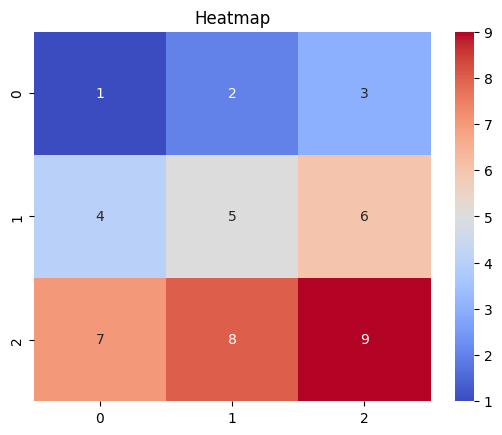

In [27]:
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
sns.heatmap(data, annot=True, cmap="coolwarm")
plt.title("Heatmap")
plt.show()


##### Create a pair plot in Seaborn:

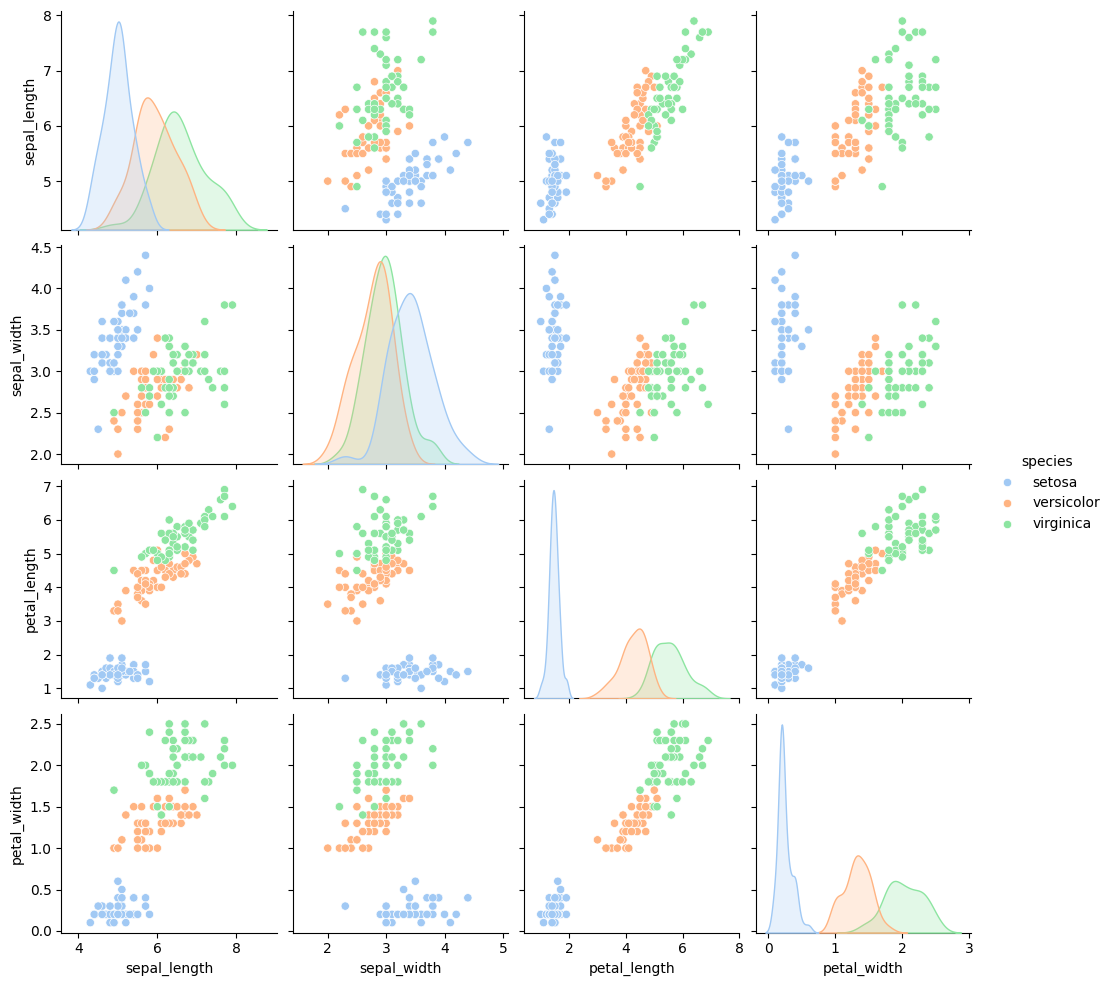

In [28]:
from seaborn import load_dataset
iris = load_dataset("iris")
sns.pairplot(iris, hue="species")
plt.show()


#### Output Details
>The pairplot generates scatter plots and histograms for all pairs of numerical columns (sepal_length, sepal_width, petal_length, petal_width).

>Scatter plots appear for unique column pairs, e.g., sepal_length vs. sepal_width.

>Diagonal plots show histograms (or KDE plots) for individual columns.

#### insights 

**1.Diagonal Histograms:**

Each diagonal shows the distribution of a single feature (e.g., sepal_length), separated by species.
    
**2.Off-Diagonal Scatter Plots:**

Pairwise comparisons of features, such as petal_length vs. petal_width.
The grouping by species highlights how the measurements differ across Setosa, Versicolor, and Virginica.

**3.Patterns in the Data:**

The scatter plots show that Setosa species points tend to cluster distinctly, while Versicolor and Virginica overlap in some features.

#### Create a violin plot:

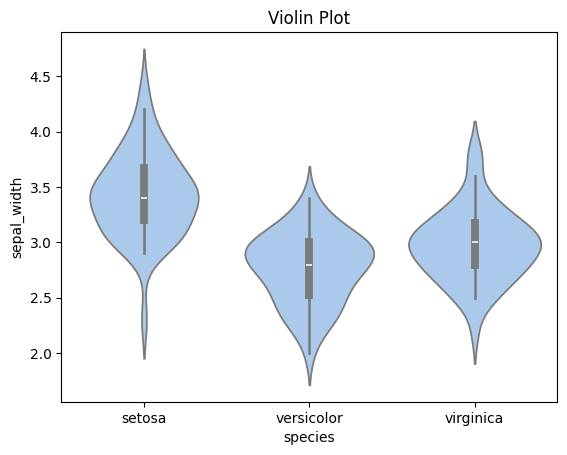

In [30]:
sns.violinplot(x="species", y="sepal_width", data=iris)
plt.title("Violin Plot")
plt.show()

#### How the Violin Plot Works
**Shape:**
Each violin represents the distribution of sepal_width for a specific species.
The wider parts indicate higher density (more observations), while narrower parts indicate lower density.

**Split Symmetry:**

The plot is symmetrical by default for aesthetic purposes (e.g., the left and right halves of the violin mirror each other).

**Boxplot Elements Inside:**

Inside each violin, the white dot represents the median.
The thick bar in the center represents the interquartile range (IQR).
Thin lines (if visible) represent the range of the data (excluding outliers).

#### What the Output Shows
**Species (x-axis):**

Separate violins for Setosa, Versicolor, and Virginica.

**Sepal Width (y-axis):**
The distribution of sepal width values for each species.

**Insights:**
Setosa's sepal_width distribution might be distinct and narrower compared to the other species.
Versicolor and Virginica may have overlapping distributions, indicating similar variability in sepal_width.

### Interactivity and Exporting
**Save a plot as an image**

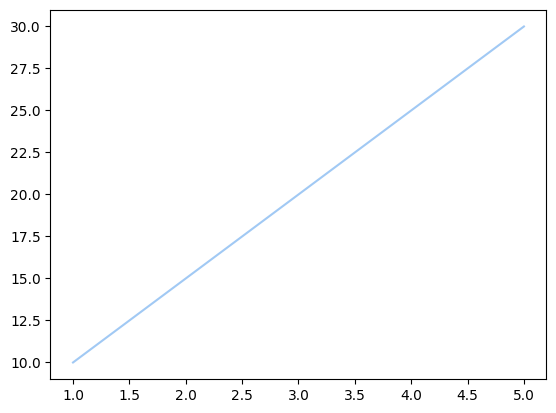

In [31]:
plt.plot(x, y)
plt.savefig("plot.png", dpi=300)

**Interactive visualizations:**

In [33]:
import plotly.express as px
fig = px.bar(x=["A", "B", "C"], y=[10, 20, 15], title="Interactive Bar Plot")
fig.show()


ModuleNotFoundError: No module named 'plotly'

#### Categorical Data Visualization
**How can you create a count plot of categories in Seaborn?**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1208\1384342209.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categories, palette="pastel")


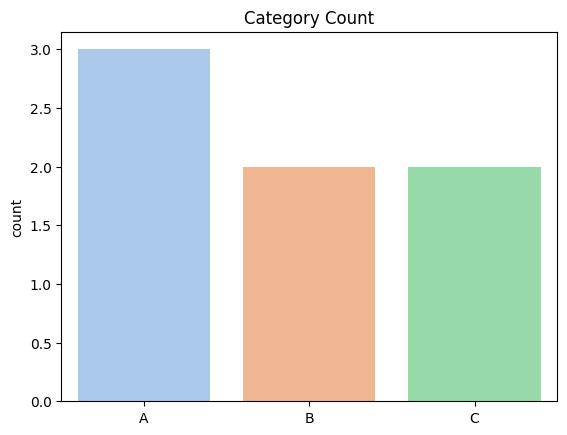

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
categories = ["A", "B", "A", "C", "A", "B", "C"]
sns.countplot(x=categories, palette="pastel")
plt.title("Category Count")
plt.show()


**How do you create a stacked bar chart in Matplotlib?**

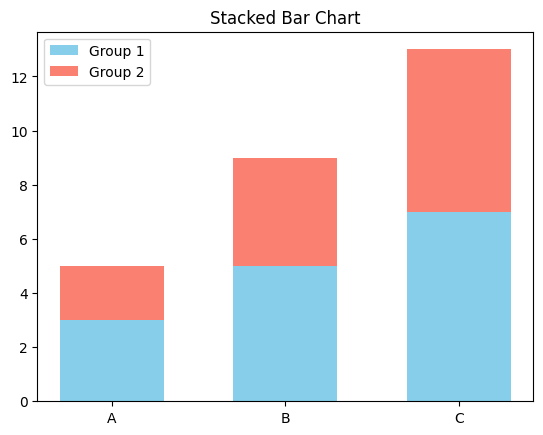

In [36]:
import numpy as np
categories = ["A", "B", "C"]
values1 = [3, 5, 7]
values2 = [2, 4, 6]

bar_width = 0.6
index = np.arange(len(categories))

plt.bar(index, values1, bar_width, label="Group 1", color='skyblue')
plt.bar(index, values2, bar_width, bottom=values1, label="Group 2", color='salmon')
plt.xticks(index, categories)
plt.legend()
plt.title("Stacked Bar Chart")
plt.show()

**How can you visualize a relationship between two variables with a regression line?**

In [37]:
sns.regplot(x="A", y="B", data=data, color="teal")
plt.title("Scatter Plot with Regression Line")
plt.show()


TypeError: list indices must be integers or slices, not str